## Observations and Insights 

# three observations


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#check dtypes for reference throughout activity
combined_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [3]:
len(combined_df["Mouse ID"])

1893

In [4]:
# Checking the number of mice.
total_mice = len(combined_df["Mouse ID"].unique())
total_mice

249

In [5]:
combined_df["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# use the duplicated function as suggested by the substitute teacher
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [7]:
duplicate_mouse.sum()

'g989'

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# Refer back to the Stu_MilesPerGallon-ScatterPlot activity for how to use loc function to look at specific value (Matplotlib day 2 module 6)
duplicate_mouse_g989 = combined_df.loc[combined_df['Mouse ID'] == "g989"]
duplicate_mouse_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df.drop_duplicates()
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
len(clean_data["Mouse ID"])

1892

In [11]:
clean_data_df = clean_data
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(clean_data_df["Mouse ID"].unique())
total_mice_clean

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_table = pd.DataFrame(clean_data_df.groupby(["Drug Regimen"]).count())
summary_statistics_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,160,160,160,160,160,160,160
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [14]:
# refer to pandas top spenders section for how to do the groupby with second column
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
variance = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
standard_deviation = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
sem = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Assemble the resulting series into a single summary dataframe.
final_summary_statistics_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
final_summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Assemble the resulting series into a single summary dataframe.
# refer back to Pandas homework for how to clean data
final_summary_statistics_table["Mean"] = final_summary_statistics_table["Mean"].map("{:,.2f}".format)
final_summary_statistics_table["Median"] = final_summary_statistics_table["Median"].map("{:,.2f}".format)
final_summary_statistics_table["Variance"] = final_summary_statistics_table["Variance"].map("{:,.2f}".format)
final_summary_statistics_table["Standard Deviation"] = final_summary_statistics_table["Standard Deviation"].map("{:,.2f}".format)
final_summary_statistics_table["SEM"] = final_summary_statistics_table["SEM"].map("{:,.2f}".format)
final_summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
agg_method_df = clean_data

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# sub teacher explained we need to use the agg function and to look it up
# https://pbpython.com/groupby-agg.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

agg_func_math = {
    'Tumor Volume (mm3)':
    ['mean', 'median', 'var', 'std', 'sem']
}
agg_method_df.groupby(['Drug Regimen']).agg(agg_func_math).round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.37  50.91  42.28  6.50  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_timepoint_table_df = summary_statistics_table.reset_index()
drug_timepoint_table_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,160,160,160,160,160,160,160
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [24]:
# refer to PandasPlot class assignment for pandas plotting (Matplotlib day 2 activity 2)
drug_and_timepoint = drug_timepoint_table_df[["Drug Regimen","Timepoint"]]
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")
drug_and_timepoint

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


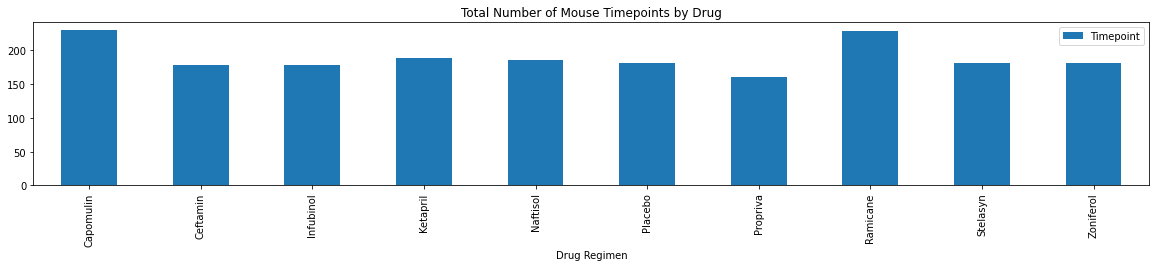

<Figure size 432x288 with 0 Axes>

In [25]:
drug_and_timepoint.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Total Number of Mouse Timepoints by Drug")

plt.show()
plt.tight_layout()

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = drug_timepoint_table_df["Drug Regimen"]
timepoint = drug_timepoint_table_df["Timepoint"]
x_axis = np.arange(len(timepoint))

Text(0, 0.5, 'Number of Timepoints')

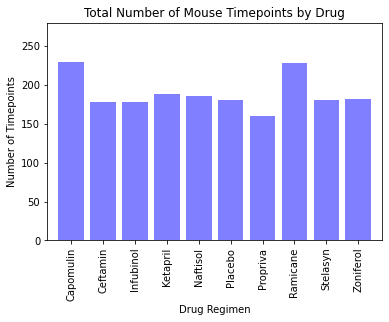

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, timepoint, color="b", alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation=90)


# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(timepoint)+50)

# Give our chart some labels and a tile
plt.title("Total Number of Mouse Timepoints by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [28]:
total_by_sex = clean_data_df.groupby(["Sex"]).count()
total_by_sex

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,934,934,934,934,934,934,934
Male,958,958,958,958,958,958,958


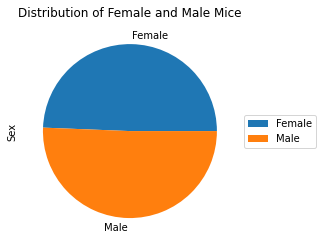

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_pie = total_by_sex.plot(kind="pie", y='Mouse ID', title=("Distribution of Female and Male Mice"))
mice_sex_pie.set_ylabel("Sex")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Female and Male Mice')

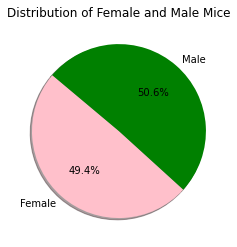

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [934, 958]

# The colors of each section of the pie chart
colors = ["pink", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Female and Male Mice")

## Quartiles, Outliers and Boxplots

In [31]:
# pull in clean data for groupby mouseID
tumor_volume_df = clean_data
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [63]:
# Groupby mouseID and find max Timepoint for each mouse (as discussed with the sub)
ftv_mouse = tumor_volume_df.groupby(["Mouse ID"])["Timepoint"].max()
ftv_mouse

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [64]:
ftv_mouse_final = ftv_mouse.reset_index()
ftv_mouse_final

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [65]:
# Combine the data into a single dataset
final_ftv_mouse = pd.merge(ftv_mouse_final, tumor_volume_df, on = ("Mouse ID", "Timepoint"), how = "left")
final_ftv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [66]:
# final_ftv_mouse = final_ftv_mouse.rename(columns = {"Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
#                                                     "Metastatic Sites_x":"Metastatic Sites",
#                                                     "Drug Regimen_x":"Drug Regimen",
#                                                     "Sex_x":"Sex",
#                                                     "Age_months_x":"Age_months",
#                                                     "Weight (g)_x":"Weight (g)"})
# final_ftv_mouse

In [67]:
# final_ftv_mouse_df = final_ftv_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# final_ftv_mouse_df

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_ftv_mouse = final_ftv_mouse.loc[final_ftv_mouse["Drug Regimen"] == "Capomulin"]
capomulin_ftv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
81,i557,45,47.685963,1,Capomulin,Female,1,24
84,i738,45,37.311846,2,Capomulin,Female,23,20
86,j119,45,38.125164,1,Capomulin,Female,7,23
88,j246,35,38.753265,1,Capomulin,Female,21,21
109,l509,45,41.483008,3,Capomulin,Male,17,21


In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ramicane_ftv_mouse = final_ftv_mouse.loc[final_ftv_mouse["Drug Regimen"] == "Ramicane"]
ramicane_ftv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
10,a520,45,38.810366,1,Ramicane,Male,13,21
12,a644,45,32.978522,1,Ramicane,Female,7,17
33,c458,30,38.342008,2,Ramicane,Female,23,20
37,c758,45,33.397653,1,Ramicane,Male,9,17
45,d251,45,37.311236,2,Ramicane,Female,8,19
52,e662,45,40.659006,2,Ramicane,Male,8,24
70,g791,45,29.128472,1,Ramicane,Male,11,16
77,i177,45,33.562402,3,Ramicane,Male,10,18


In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
infubinol_ftv_mouse = final_ftv_mouse.loc[final_ftv_mouse["Drug Regimen"] == "Infubinol"]
infubinol_ftv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
11,a577,30,57.031862,2,Infubinol,Female,6,25
13,a685,45,66.083066,3,Infubinol,Male,8,30
27,c139,45,72.226731,2,Infubinol,Male,11,28
31,c326,5,36.321346,0,Infubinol,Female,18,25
41,c895,30,60.969711,2,Infubinol,Female,7,29
50,e476,45,62.435404,1,Infubinol,Male,23,26
56,f345,45,60.918767,1,Infubinol,Male,23,26
79,i386,40,67.289621,4,Infubinol,Female,23,29


In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ceftamin_ftv_mouse = final_ftv_mouse.loc[final_ftv_mouse["Drug Regimen"] == "Ceftamin"]
ceftamin_ftv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
76,h531,5,47.784682,0,Ceftamin,Male,5,27
89,j296,45,61.849023,3,Ceftamin,Female,24,30
95,k210,45,68.923185,3,Ceftamin,Male,15,28
107,l471,45,67.748662,1,Ceftamin,Female,7,28
108,l490,30,57.918381,3,Ceftamin,Male,24,26


In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [72]:
#Drug Regimen Capomulin
#Refer to Quartiles and Outliers class lecture (Matplotlib day 3 module 2)
# I pulled the four drugs into separate data frames above so I need to set my quartiles to the correct drug data frame and look at the Tumor Volume row
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

quartiles = capomulin_ftv_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [73]:
#Drug Regimen Ramicane

quartiles = ramicane_ftv_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [74]:
#Drug Regimen Infubinol

quartiles = infubinol_ftv_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [75]:
#Drug Regimen Ceftamin

quartiles = ceftamin_ftv_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


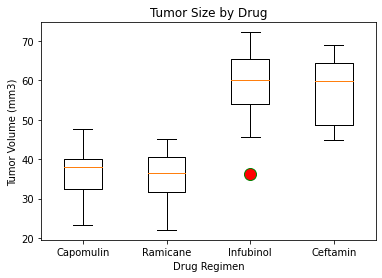

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Refer to Quartiles and Outliers class lecture (Matplotlib day 3 module 2)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# https://www.quora.com/I-am-drawing-the-boxplot-using-Python-but-I-want-the-labels-in-the-x-axis-to-be-displayed-vertically-rather-than-horizontally-How-do-I-do-this

# Create list for the boxes (similar to class example of temperature where we grabbed a row of specific data from a data frame)
capomulin = capomulin_ftv_mouse["Tumor Volume (mm3)"]
ramicane = ramicane_ftv_mouse["Tumor Volume (mm3)"]
infubinol = infubinol_ftv_mouse["Tumor Volume (mm3)"]
ceftamin = ceftamin_ftv_mouse["Tumor Volume (mm3)"]

drugs_for_boxplot = [capomulin, ramicane, infubinol, ceftamin]
outliers_dict = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size by Drug')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(drugs_for_boxplot, flierprops= outliers_dict , labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [47]:
capomulin_mouse_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [48]:
capomulin_mouse_j246_df = capomulin_mouse_df.loc[capomulin_mouse_df["Mouse ID"] == "j246"]
capomulin_mouse_j246_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
226,j246,0,45.000000,0,Capomulin,Female,21,21
451,j246,5,45.641438,0,Capomulin,Female,21,21
704,j246,10,46.408361,0,Capomulin,Female,21,21
791,j246,15,43.312654,0,Capomulin,Female,21,21
1020,j246,20,44.020370,0,Capomulin,Female,21,21
1276,j246,25,44.555226,0,Capomulin,Female,21,21
1354,j246,30,38.044082,1,Capomulin,Female,21,21
1497,j246,35,38.753265,1,Capomulin,Female,21,21


In [49]:
capomulin_mouse_j246_df = capomulin_mouse_j246_df[["Tumor Volume (mm3)", "Timepoint"]]
capomulin_mouse_j246_df

,Tumor Volume (mm3),Timepoint
226,45.000000,0
451,45.641438,5
704,46.408361,10
791,43.312654,15
1020,44.020370,20
1276,44.555226,25
1354,38.044082,30
1497,38.753265,35


In [50]:
j246_tumor_volume = capomulin_mouse_j246_df["Tumor Volume (mm3)"]
j246_timepoint = capomulin_mouse_j246_df["Timepoint"]


Text(0.5, 1.0, 'Mouse j246 Treated with Capomulin')

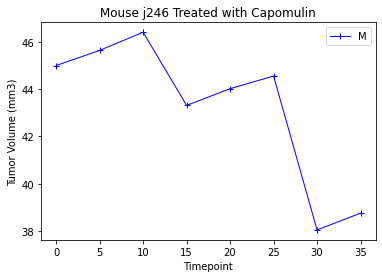

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Refer to Stu_LegendaryTemperature class lecture (Matplotlib day 1 module 4)

mouse_j246 = plt.plot(j246_timepoint, j246_tumor_volume, marker="+",color="blue", linewidth=1, label="Mouse j246")
plt.legend("Mouse j246", loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse j246 Treated with Capomulin")

In [52]:
avg_tumor_vol_capomulin_df = pd.DataFrame(capomulin_mouse_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor_vol_capomulin_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [53]:
avg_tumor_vol_capomulin_df = avg_tumor_vol_capomulin_df.rename(columns = {"Tumor Volume (mm3)": "Average Size of Tumor"})
avg_tumor_vol_capomulin_df                                    

,Mouse ID,Weight (g),Average Size of Tumor
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


Text(0, 0.5, 'Average Size of Tumor (mm3)')

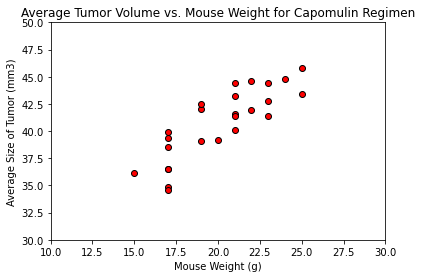

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Refer to Stu_ScatterPy class lecture (Matplotlib day 1 module 12)

plt.scatter(avg_tumor_vol_capomulin_df["Weight (g)"], avg_tumor_vol_capomulin_df["Average Size of Tumor"], marker="o", facecolors="red", edgecolors="black")
plt.ylim(30,50)
plt.xlim(10,30)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Size of Tumor (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


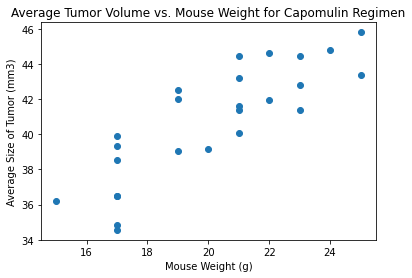

In [55]:
# Calculate the correlation coefficient and linear regression model 
# Refer to Ins_Correlation_Conundrum class lecture (Matplotlib day 3 module 6)

capomulin_mouse_weight = avg_tumor_vol_capomulin_df["Weight (g)"]
capomulin_avg_tumor_size = avg_tumor_vol_capomulin_df["Average Size of Tumor"]
correlation = st.pearsonr(capomulin_mouse_weight,capomulin_avg_tumor_size)
plt.scatter(capomulin_mouse_weight,capomulin_avg_tumor_size)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Size of Tumor (mm3)")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [56]:
# x_values = capomulin_mouse_weight
# y_values = capomulin_avg_tumor_size
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(35,36),fontsize=15,color="red")
# plt.xlabel("Mouse Weight (g)")
# plt.ylabel("Average Size of Tumor (mm3)")
# plt.show()


In [57]:
# Perform a linear regression on weight versus avg tumor size
# Refer to Stu_Fits_and_Regression class lecture (Matplotlib day 3 module 9)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(capomulin_mouse_weight, capomulin_avg_tumor_size)
vc_slope, vc_int, vc_r, vc_p, vc_std_err

(0.9544396890241049,
 21.552160532685008,
 0.8419363424694721,
 1.3225722434712404e-07,
 0.12754359033201323)

In [58]:
# Create equation of line to calculate predicted avg tumor size
vc_fit = vc_slope * capomulin_mouse_weight + vc_int

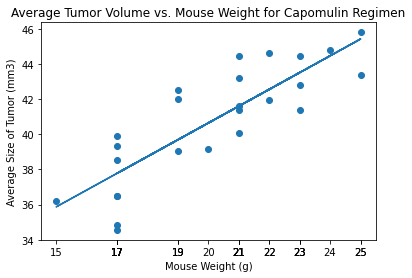

In [59]:
# Plot the linear model on top of scatter plot 
capomulin_mouse_weight = avg_tumor_vol_capomulin_df["Weight (g)"]
capomulin_avg_tumor_size = avg_tumor_vol_capomulin_df["Average Size of Tumor"]
plt.scatter(capomulin_mouse_weight,capomulin_avg_tumor_size)
plt.plot(capomulin_mouse_weight,vc_fit)
plt.xticks(capomulin_mouse_weight)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Size of Tumor (mm3)")
plt.show()

In [60]:

# for mouse weight and average tumor volume for the Capomulin regimen
